58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/60
33/33 [==============================] - 107s 3s/step - loss: 8.7918 - accuracy: 0.0601 - val_loss: 3.4326 - val_accuracy: 0.0722
Epoch 2/60
33/33 [==============================] - 76s 2s/step - loss: 2.6414 - accuracy: 0.2217 - val_loss: 2.1768 - val_accuracy: 0.3012
Epoch 3/60
33/33 [==============================] - 77s 2s/step - loss: 1.7700 - accuracy: 0.4576 - val_loss: 1.7297 - val_accuracy: 0.4663
Epoch 4/60
33/33 [==============================] - 77s 2s/step - loss: 1.3147 - accuracy: 0.5870 - val_loss: 1.0906 - val_accuracy: 0.6662
Epoch 5/60
33/33 [==============================] - 76s 2s/step - loss: 1.0257 - accuracy: 0.6796 - val_loss: 1.0914 - val_accuracy: 0.6329
Epoch 6/60
33/33 [==============================] - 76s 2s/step - loss: 0.9028 - accuracy: 0.7108 - val_loss: 0.8613 - val_accuracy: 0.7363
Epoch 7/60
33/33 [==============================] - 76s 2s/step - loss: 0.7441 - accuracy: 0.7632 - val_loss: 0.8257 - val_accuracy: 0.7384
Epoch 8/60
33/33 [=

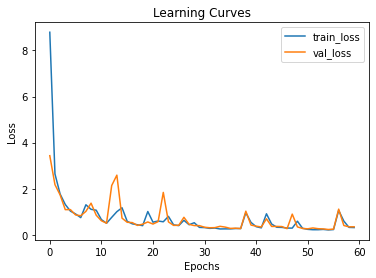

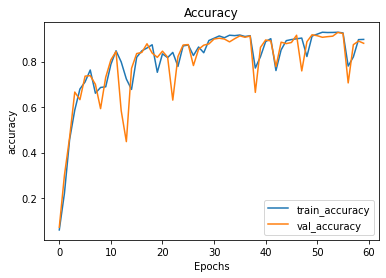

In [1]:
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
import pickle
import numpy as np
from matplotlib import pyplot


def load_data():
    with open('/content/drive/MyDrive/Data/Data-224x224.data', 'rb') as file:
        data = pickle.load(file)
        file.close()
    return data


def get_model(num_class):
    vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    vgg16.summary()

    for layer in vgg16.layers:
        layer.trainable = False

    my_model = Sequential()
    my_model.add(vgg16)
    my_model.summary()

    my_model.add(Flatten(name='Flatten'))
    my_model.add(Dense(4096, activation='relu', name='fc1'))
    #my_model.add(Dropout(0.5))
    my_model.add(Dense(2048, activation='relu', name='fc2'))
    #my_model.add(Dropout(0.5))
    my_model.add(Dense(num_class, activation='softmax', name='predictions'))
    my_model.summary()

    my_model.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

    return my_model


def train_model():
    # Load data
    data = load_data()
    
    # Gán data
    labels = data[0]
    pixels = data[1]

    pixels = np.array(pixels)
    labels = np.array(labels)
    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    # Load model và tạo checkpoint để lưu lại weights có accuracy cao nhất
    vggmodel = get_model(len(sorted(set(data[0]), key=data[0].index)))
    filepath = '/content/drive/MyDrive/models/model1/weights-{epoch:02d}-{val_accuracy:.2f}.hdf5'
    #checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',
                                 #verbose=1, save_best_only=True, mode='max')
    # Chia tập dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(
        pixels, labels, test_size=0.3, random_state=2)
    # Train model
    aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1, rescale=1. / 255,
                             width_shift_range=0.1, height_shift_range=0.1,
                             horizontal_flip=True, brightness_range=[0.2, 1.3],
                             fill_mode='nearest')
    _graph = vggmodel.fit_generator(aug.flow(X_train, y_train, batch_size=105), epochs=60,
                           validation_data=aug.flow(X_test, y_test, batch_size=45))
    #vggmodel.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=18,epochs=100,callbacks=[checkpoint])
    vggmodel.save('/content/drive/MyDrive/models/model1/model.h5')

    # plot learning curves
    pyplot.title('Learning Curves')
    pyplot.xlabel('Epochs')
    pyplot.ylabel('Loss')
    pyplot.plot(_graph.history['loss'], label='train_loss')
    pyplot.plot(_graph.history['val_loss'], label='val_loss')
    pyplot.legend()
    pyplot.show()


    pyplot.title('Learning Curves')
    pyplot.xlabel('Epochs')
    pyplot.ylabel('Accuracy')
    pyplot.plot(_graph.history['accuracy'], label='train_accuracy')
    pyplot.plot(_graph.history['val_accuracy'], label='val_accuracy')
    pyplot.legend()
    pyplot.show()

train_model()


